     ┌───┐┌─┐   
q_0: ┤ H ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ H ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 
2
Counts: {'01': 2566, '11': 2565, '10': 2426, '00': 2443}
Probabilities: {'01': 0.2566, '11': 0.2565, '10': 0.2426, '00': 0.2443}


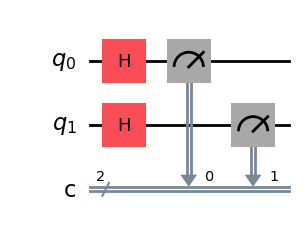

In [147]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

qc = QuantumCircuit(2,2)
qc.h([0,1])
# qc.x({0})
qc.measure([0,1],[0,1])

sim = AerSimulator()
qc_sim = transpile(qc,sim)
job = sim.run(qc_sim,shots=10_000)
result = job.result()

counts = result.get_counts()
shots = sum(counts.values())
probs = {bit: cnt / shots for bit, cnt in counts.items()}

print(qc_sim)           # see basis gates / mapping
print(qc_sim.depth())   # circuit depth after optimization
print("Counts:", counts)
print("Probabilities:", probs)
qc.draw("mpl")



In [136]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc_u = QuantumCircuit(1)
qc_u.h(0)  # same unitary as above, but no measure here

sv = Statevector.from_instruction(qc_u)
probs_exact = sv.probabilities_dict()  # e.g., {'0': 0.5, '1': 0.5}
print(probs_exact)

{np.str_('0'): np.float64(0.4999999999999999), np.str_('1'): np.float64(0.4999999999999999)}


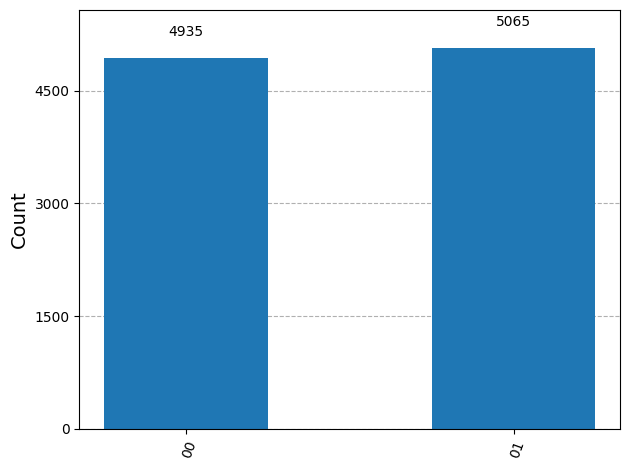

In [137]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)  # or plot_histogram(probs)


In [287]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

def addAB(a,b):
    sim = AerSimulator()

    qc = QuantumCircuit(3,2)
    if a: qc.x(0)
    if b: qc.x(1)
    qc.ccx(0,1,2)
    qc.cx(0,1)
    qc.measure([1,2],[1,0])

    res = sim.run(transpile(qc, sim), shots=10_000).result()
    counts = res.get_counts()
    # s = sum(counts.values())
    # probs = {k: v/s for k, v in counts.items()}

    return counts
    
for a in (0,1):
    for b in (0,1):
        probs = addAB(a,b)
        print(f"{a} + {b} = {probs}")


0 + 0 = {'00': 10000}
0 + 1 = {'10': 10000}
1 + 0 = {'10': 10000}
1 + 1 = {'01': 10000}
